<a href="https://colab.research.google.com/github/JASWANTH456/randomwalk-ds-assessment-level2/blob/main/Random_walk_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
penguins = sns.load_dataset('penguins')

# Display initial information
print(penguins.info())
print(penguins.describe())

# Identify missing values
missing_data = penguins.isnull().sum()
print("Missing Values:\n", missing_data)

# Handling missing data (drop rows with missing values for simplicity)
penguins_cleaned = penguins.dropna()

# Check for duplicates
duplicates = penguins_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display cleaned dataset
print(penguins_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

In [11]:
# Calculate the average body mass for Gentoo penguins
gentoo_avg_mass = penguins_cleaned[penguins_cleaned['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body_mass_g for Gentoo penguins: {gentoo_avg_mass:.2f}")


Average body_mass_g for Gentoo penguins: 5092.44


In [12]:
from scipy.stats import skew, kurtosis

# Analyze skewness and kurtosis
for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"\nAnalysis of {feature}:")
    for species in penguins_cleaned['species'].unique():
        species_data = penguins_cleaned[penguins_cleaned['species'] == species][feature]
        print(f"{species} - Skewness: {skew(species_data):.2f}, Kurtosis: {kurtosis(species_data):.2f}")



Analysis of bill_length_mm:
Adelie - Skewness: 0.16, Kurtosis: -0.18
Chinstrap - Skewness: -0.09, Kurtosis: -0.05
Gentoo - Skewness: 0.60, Kurtosis: 1.14

Analysis of bill_depth_mm:
Adelie - Skewness: 0.31, Kurtosis: -0.07
Chinstrap - Skewness: 0.01, Kurtosis: -0.90
Gentoo - Skewness: 0.30, Kurtosis: -0.62


bill_length_mm - Number of outliers: 0
bill_depth_mm - Number of outliers: 0
flipper_length_mm - Number of outliers: 0
body_mass_g - Number of outliers: 0


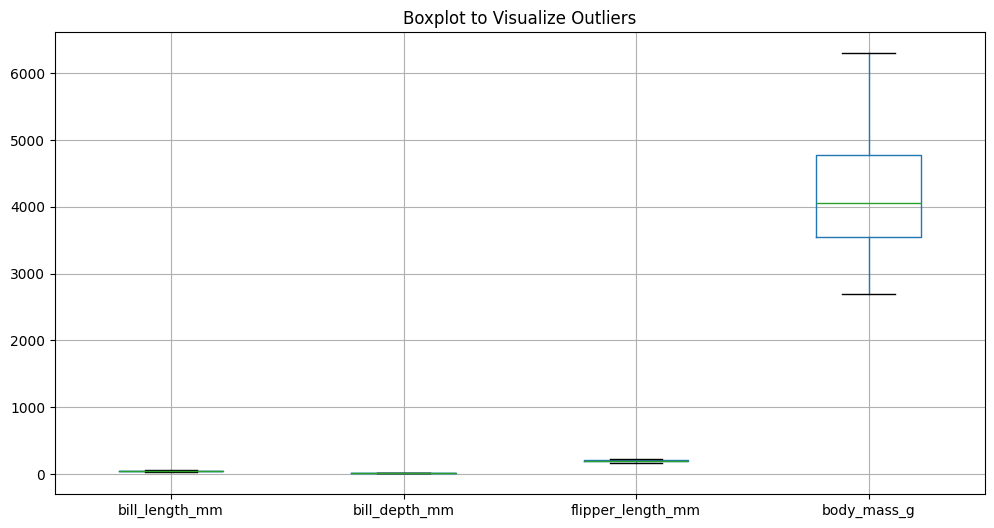

In [5]:
import matplotlib.pyplot as plt

def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers for numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numerical_features:
    outliers = detect_outliers(penguins_cleaned, feature)
    print(f"{feature} - Number of outliers: {len(outliers)}")

# Visualize outliers
plt.figure(figsize=(12, 6))
penguins_cleaned[numerical_features].boxplot()
plt.title("Boxplot to Visualize Outliers")
plt.show()


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features and scale them
features = penguins_cleaned[numerical_features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Variance explained by each principal component
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.68633893 0.19452929]


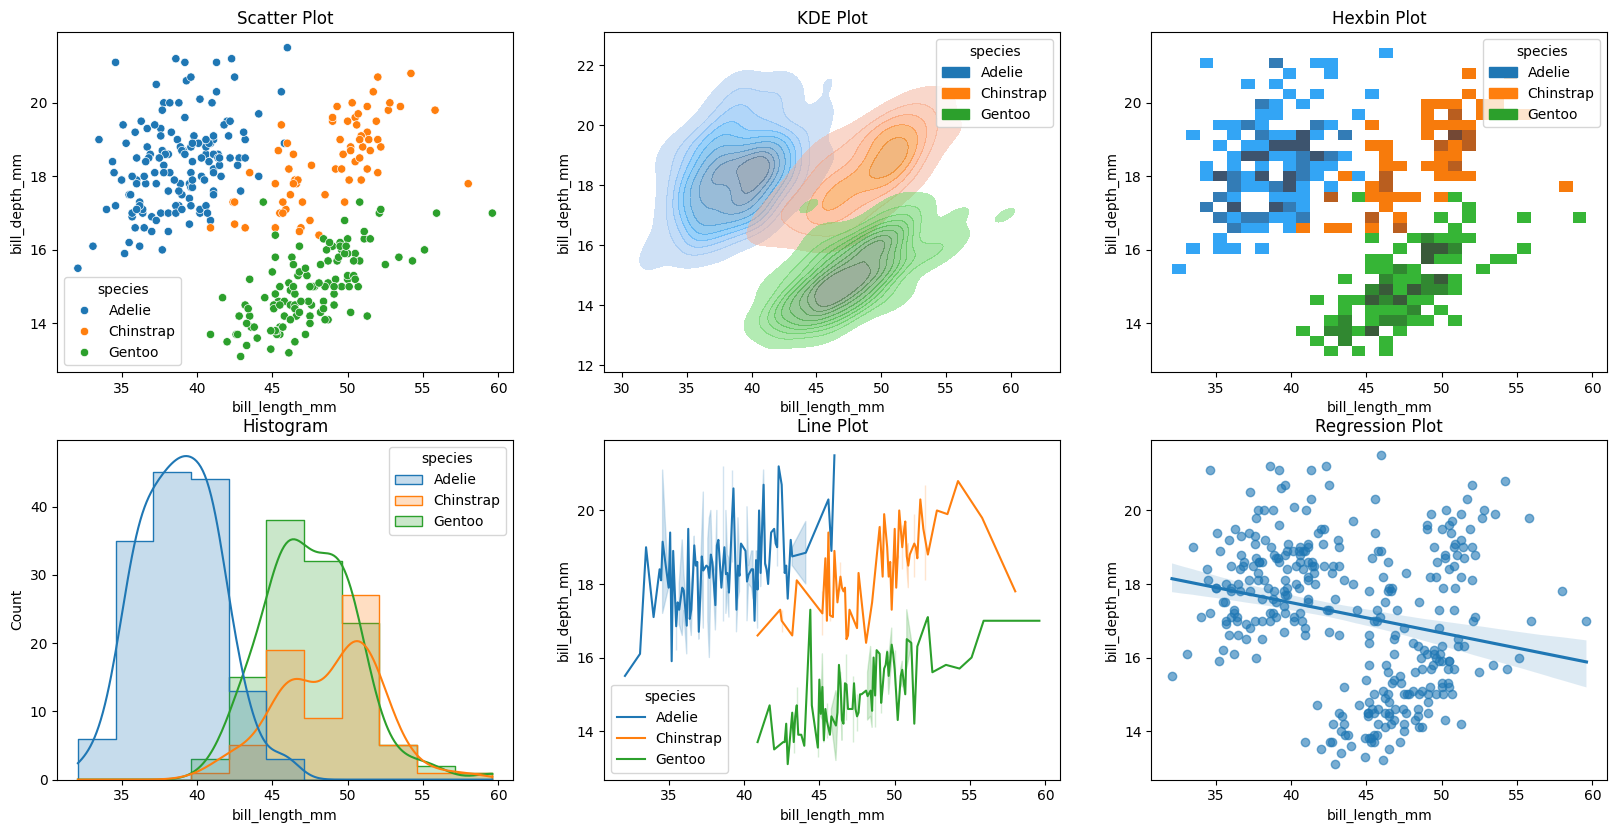

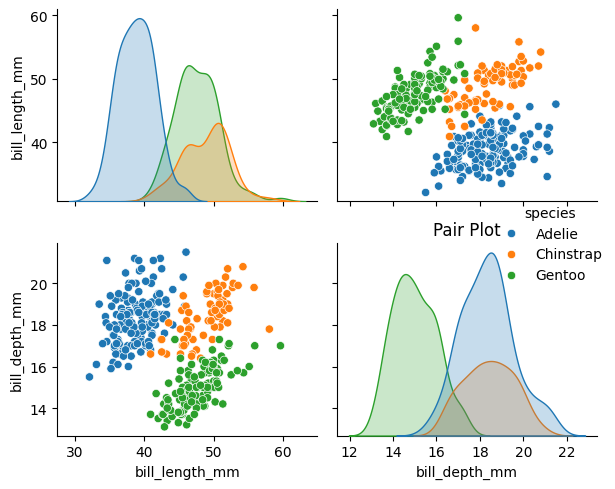

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
data = penguins_cleaned

# Plot 7 different visualizations
plt.figure(figsize=(20, 15))

# Scatter plot
plt.subplot(3, 3, 1)
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Scatter Plot')

# KDE plot
plt.subplot(3, 3, 2)
sns.kdeplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, alpha=0.5)
plt.title('KDE Plot')

# Hexbin plot
plt.subplot(3, 3, 3)
sns.histplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', bins=30, pmax=0.8, cmap="viridis")
plt.title('Hexbin Plot')

# Histogram
plt.subplot(3, 3, 4)
sns.histplot(data=data, x='bill_length_mm', hue='species', element="step", kde=True)
plt.title('Histogram')

# Line plot
plt.subplot(3, 3, 5)
sns.lineplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Line Plot')

# Regression plot
plt.subplot(3, 3, 6)
sns.regplot(data=data, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'alpha': 0.6})
plt.title('Regression Plot')

# Pair plot (Separate visualization outside the grid)
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.title('Pair Plot')  # Note: Pair plot doesn't integrate well into the grid.

plt.tight_layout()
plt.show()


In [8]:
max_flipper = penguins_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max()
print(max_flipper)


species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [14]:
from scipy.stats import zscore

# Normalize numerical features
normalized_data = penguins_cleaned.copy()
for feature in numerical_features:
    normalized_data[feature] = zscore(normalized_data[feature])

print(normalized_data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.896042       0.780732          -1.426752   
1  Adelie  Torgersen       -0.822788       0.119584          -1.069474   
2  Adelie  Torgersen       -0.676280       0.424729          -0.426373   
4  Adelie  Torgersen       -1.335566       1.085877          -0.569284   
5  Adelie  Torgersen       -0.859415       1.747026          -0.783651   

   body_mass_g     sex  
0    -0.568475    Male  
1    -0.506286  Female  
2    -1.190361  Female  
4    -0.941606  Female  
5    -0.692852    Male  
